In [1]:
import numpy as np
import pymc3 as pm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
import fitness_mcmc
import fitness_mcmc.data_io as io
import fitness_mcmc.fitness_mcmc as m
import fitness_mcmc.format_raw as raw

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


FileNotFoundError: [Errno 2] No such file or directory: 'pop1_gluL_1_1.csv'

formatting done
[[[  1710]
  [   423]
  [   255]
  [   674]
  [     0]]

 [[  1767]
  [   454]
  [   265]
  [   706]
  [     0]]

 [[  1981]
  [   553]
  [   486]
  [  4610]
  [     0]]

 [[  1885]
  [   403]
  [   285]
  [   730]
  [     0]]

 [[  2119]
  [   550]
  [   526]
  [  4938]
  [     0]]

 [[  2207]
  [   607]
  [   418]
  [  1085]
  [     0]]

 [[  2182]
  [   512]
  [   337]
  [  1025]
  [     0]]

 [[  1853]
  [   472]
  [   278]
  [   792]
  [     0]]

 [[  2247]
  [   527]
  [   336]
  [   877]
  [     0]]

 [[  2069]
  [   518]
  [   291]
  [   822]
  [     0]]

 [[  2095]
  [   520]
  [   345]
  [   988]
  [     0]]

 [[  2066]
  [   506]
  [   351]
  [   959]
  [     0]]

 [[  2064]
  [   537]
  [   311]
  [  1008]
  [     0]]

 [[  1970]
  [   471]
  [   254]
  [   751]
  [     0]]

 [[  1930]
  [   487]
  [   348]
  [   826]
  [     0]]

 [[  2209]
  [   532]
  [   344]
  [  1094]
  [     0]]

 [[  2080]
  [   490]
  [   318]
  [   902]
  [     0]]

 [[  1764]
  [ 

ValueError: x and y must have same first dimension, but have shapes (6,) and (1, 5, 29)

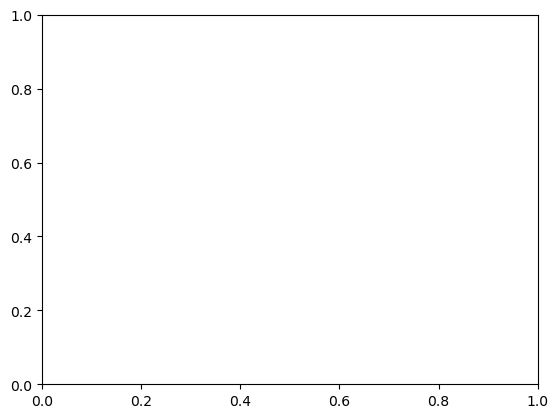

In [5]:
population = "pop1"
environment = "gluL"
replicate = 2
r = population + "_" + environment + str(replicate)
raw.format_data(population, environment, 3)

data, time, ordered_counts = io.load_data("LTEE_" + r + ".csv", return_ordered = False, delimiter=",")
print(ordered_counts.astype("int"))
print(data)

ordered_frequencies = ordered_counts / np.sum(ordered_counts, axis = 0)

plt.plot([0,7,14,21,28,35], ordered_frequencies.T)
plt.xlabel('Time (generations)')
plt.ylabel('Frequency')
plt.show()

In [18]:
fitness_model = m.Fitness_Model(ordered_counts, time, s_ref = 1, prior="flat")
fitness_model.find_MAP()

C:\Users\jedwa\anaconda3\envs\Fitness_code\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in true_divide
  variables = ufunc(*ufunc_args, **ufunc_kwargs)


In [19]:
raw_s = fitness_model.map_estimate["s"]
vals_f0 = fitness_model.map_estimate["f0"]
vals_s = np.zeros((29))
vals_s[0] = 0
for i in range(0, len(raw_s)):
    vals_s[i + 1] = raw_s[i]
vals_data = fitness_model.data
print(raw_s)
print(vals_f0)
fitness_model.plot_MAP_estimate(type = "lin", filename="LTEE_" + r + "_freq.png")

[[ 1.00798098]
 [ 1.16964209]
 [ 1.01280557]
 [ 1.16968248]
 [ 1.0950027 ]
 [ 1.09413581]
 [ 1.00421262]
 [ 1.01037917]
 [ 0.9997854 ]
 [ 1.00621507]
 [ 0.99532558]
 [ 1.09874702]
 [ 1.00723838]
 [ 0.99553999]
 [ 1.09439168]
 [ 1.01467563]
 [ 1.16833348]
 [ 1.00555623]
 [-0.00434231]
 [-0.0041491 ]
 [ 1.21732407]
 [ 1.21900344]
 [ 1.22290108]
 [ 1.25774479]
 [ 1.30452188]
 [ 1.30002061]
 [ 1.34799903]
 [ 1.37365334]]
[0.04162227 0.03946238 0.04230454 0.03998815 0.0452747  0.04883042
 0.04746533 0.04312633 0.0489428  0.05044205 0.04770338 0.05276635
 0.04299792 0.04438573 0.049136   0.0495707  0.04321779 0.0332698
 0.04829253 0.01205341 0.01075359 0.01140451 0.01032031 0.01336445
 0.01635248 0.01646238 0.02154622 0.00496511 0.02397839]


UFuncTypeError: Cannot cast ufunc 'true_divide' output from dtype('float64') to dtype('int64') with casting rule 'same_kind'

In [ ]:
out = open("Fitness_" + r + ".csv", "w")
header = "BC,0,7,14,21,28,35,s,f0"
bc = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,500,1000,1500,2000,5000,10000,15000,30000,40000,50000]
out.write(header)
out.write("\n")
for l in range(0, len(vals_s)):
    holder = str(bc[l])
    for h in range(0, 6):
        holder += ',' + str(vals_data[l][h])
    holder += ',' + str(vals_s[l]) + ',' + str(vals_f0[l])
    out.write(holder)
    out.write("\n")
out.close()

In [ ]:
traj = m.create_trajectories(vals_f0, vals_s, time)
err_data = m.sample_lineages(traj, 100000)
print(err_data)

In [ ]:
out = open("C:\\Users\\jedwa\\Documents\\Desai_Lab\\LTEE\\Fitness_code\\fitness_mcmc\\fitness_mcmc\\experimental_data\\Sim_counts_" + r + ".csv", "w")
header = "BC,0,7,14,21,28,35"
bc = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,500,1000,1500,2000,5000,10000,15000,30000,40000,50000]
out.write(header)
out.write("\n")
for l in range(0, len(vals_s)):
    holder = str(bc[l])
    for h in range(0, 6):
        holder += ',' + str(err_data[l][h])
    out.write(holder)
    out.write("\n")
out.close()

In [ ]:
data, time, err_counts = io.load_data("Sim_counts_" + r + ".csv", return_ordered = False, delimiter=",")
print(err_counts.astype("int"))
print(data)

err_frequencies = err_counts / np.sum(err_counts, axis = 0)

plt.plot([0,7,14,21,28,35], err_frequencies.T)
plt.xlabel('Time (generations)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
err_model = m.Fitness_Model(err_counts, time, s_ref = 0, prior="flat")
err_model.find_MAP()

In [ ]:
#err_model.plot_MAP_estimate(type = "lin", filename="Error_" + r + "_freq.png")
e_raw_s = err_model.map_estimate["s"]
e_vals_f0 = err_model.map_estimate["f0"]
e_vals_s = np.zeros((29))
e_vals_s[0] = 0
for i in range(0, len(e_raw_s)):
    e_vals_s[i + 1] = e_raw_s[i]
e_vals_data = err_model.data

In [ ]:
out = open("FitnessError_" + r + ".csv", "w")
header = "BC,s,f0,s_err,f0_err"
bc = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,500,1000,1500,2000,5000,10000,15000,30000,40000,50000]
out.write(header)
out.write("\n")
for l in range(0, len(e_vals_s)):
    holder = str(bc[l])
    holder += ',' + str(vals_s[l]) + ',' + str(vals_f0[l]) + ',' + str(e_vals_s[l]) + ',' + str(e_vals_f0[l])
    out.write(holder)
    out.write("\n")
out.close()